In [1]:
#import dependencies
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from collections import Counter
import glob
import os

In [20]:
#define path for all files in work folder
path = r'' 
all_files = glob.glob(os.path.join(path, "*.csv"))

#create empty dataframe and list for dataframe build
frame = pd.DataFrame()
list_ = []

#loop through all files in work folder, select columns, and convert publish_date column to datetime format
for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    df_edit = pd.DataFrame(df[['external_author_id', 
                              'author', 
                              'content', 
                              'region', 
                              'language', 
                              'publish_date',
                              'following', 
                              'followers',
                             'account_type',
                             'account_category',
                             'retweet',
                             'tweet_id']])
    df_edit['publish_date'] = df_edit['publish_date'].str.split(' ', expand=True)
    df_edit['publish_date'] = pd.to_datetime(df_edit['publish_date'])
    list_.append(df_edit)

#concat appended list into single data frame
frame = pd.concat(list_)
frame.head()

C:\Users\joshu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\joshu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\joshu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,external_author_id,author,content,region,language,publish_date,following,followers,account_type,account_category,retweet,tweet_id
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01,1052,9636,Right,RightTroll,0,914580356430536707
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01,1054,9637,Right,RightTroll,0,914621840496189440
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01,1054,9637,Right,RightTroll,1,914623490375979008
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01,1062,9642,Right,RightTroll,0,914639143690555392
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01,1050,9645,Right,RightTroll,1,914312219952861184


In [35]:
#categorize publish_date into new column time_period

pre_analysis = frame['publish_date'] < pd.to_datetime('7/1/2015')
before = (frame['publish_date'] > pd.to_datetime('6/30/2015')) & (frame['publish_date'] <= pd.to_datetime('3/1/2016')) 
during = (frame['publish_date'] > pd.to_datetime('3/1/2016'))  & (frame['publish_date'] <= pd.to_datetime('12/1/2016'))
after = (frame['publish_date'] > pd.to_datetime('12/1/2016')) & (frame['publish_date'] <= pd.to_datetime('6/30/2017'))
post_analysis = frame['publish_date'] > pd.to_datetime('7/1/2017')

frame.loc[before, "time_period"] = 'Pre-election'
frame.loc[during, "time_period"] = 'Election season'
frame.loc[after, "time_period"] = 'Post-election'
frame.loc[pre_analysis, "time_period"] = 'Pre-analysis'
frame.loc[post_analysis, "time_period"] = 'Post-analysis'
frame.head()

,external_author_id,author,content,region,language,publish_date,following,followers,account_type,account_category,retweet,tweet_id,time_period
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01,1052,9636,Right,RightTroll,0,914580356430536707,Post-analysis
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01,1054,9637,Right,RightTroll,0,914621840496189440,Post-analysis
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01,1054,9637,Right,RightTroll,1,914623490375979008,Post-analysis
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01,1062,9642,Right,RightTroll,0,914639143690555392,Post-analysis
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01,1050,9645,Right,RightTroll,1,914312219952861184,Post-analysis


In [36]:
#get count of time_periods in complete dataframe (total count of rows = 2,945,013)
frame_count = frame['time_period'].value_counts()
frame_count

Pre-election       817992
Election season    816524
Post-election      760125
Post-analysis      382867
Pre-analysis       167505
Name: time_period, dtype: int64

       index  language
0    English   2116867
1    Russian    610943
2     German     86983
3  Ukrainian     38669


(-1.1192320398371511, 1.1009158130738101, -1.111716423521399, 1.12027046682135)

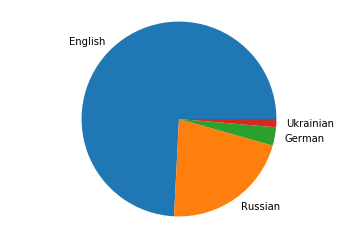

In [41]:
# find and list top 4 language breakdown of tweets
lang_count = frame['language'].value_counts()
lang_count = lang_count.reset_index()
print(lang_count.head(4))

# graph tweets by language
labels = lang_count['index'].head(4)
plt.pie(lang_count['language'].head(4), labels=labels, startangle=0)
plt.axis('equal')

        index  account_type
0       Right        711668
1     Russian        704917
2       local        459220
3        Left        427141
4   Hashtager        241786
5        news        139006
6  Commercial        121904


(-1.10736957821143,
 1.1014065050313646,
 -1.1135569138663843,
 1.1076712695574675)

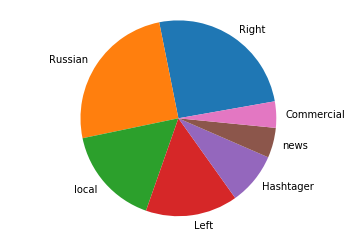

In [45]:
# find and list top 7 account type breakdown of tweets
type_count = frame['account_type'].value_counts()
type_count = type_count.reset_index()
print(type_count.head(7))

# graph tweets by type
labels = type_count['index'].head(7)
plt.pie(type_count['account_type'].head(7), labels=labels, startangle=10)
plt.axis('equal')

          index  account_category
0    NonEnglish            820803
1    RightTroll            711668
2      NewsFeed            598226
3     LeftTroll            427141
4  HashtagGamer            241786
5    Commercial            121904
6       Unknown             13539
7    Fearmonger             11140


(-1.1333940506256628,
 1.1041802424817604,
 -1.1238238686533835,
 1.110749493179307)

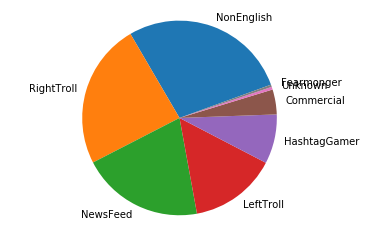

In [46]:
# find and list account category breakdown of tweets
category_count = frame['account_category'].value_counts()
category_count = category_count.reset_index()
print(category_count)

# graph tweets by language
labels = category_count['index']
plt.pie(category_count['account_category'], labels=labels, startangle=20)
plt.axis('equal')

In [48]:
# keep only rows where the language is English
english_troll = frame[frame['language'].str.match('English')]
english_troll.index = pd.RangeIndex(len(english_troll.index))
english_troll.head()

,external_author_id,author,content,region,language,publish_date,following,followers,account_type,account_category,retweet,tweet_id,time_period
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01,1052,9636,Right,RightTroll,0,914580356430536707,Post-analysis
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01,1054,9637,Right,RightTroll,0,914621840496189440,Post-analysis
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01,1054,9637,Right,RightTroll,1,914623490375979008,Post-analysis
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01,1062,9642,Right,RightTroll,0,914639143690555392,Post-analysis
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01,1050,9645,Right,RightTroll,1,914312219952861184,Post-analysis


In [49]:
# find most used words in content


words = []
for row in english_troll:
    csv_words = row[0:].split(" ")
    for i in csv_words:
        words.append(i)
    print(csv_words)

words_counted = []
for i in words:
    x = words.count(i)
    words_counted.append((i,x))

set(words_counted)
    





#content = (row[2] for row in english_troll)
#print("Most frequent value: {0}".format(Counter(content).most_common()[0][0]))


['external_author_id']
['author']
['content']
['region']
['language']
['publish_date']
['following']
['followers']
['account_type']
['account_category']
['retweet']
['tweet_id']
['time_period']


{('account_category', 1),
 ('account_type', 1),
 ('author', 1),
 ('content', 1),
 ('external_author_id', 1),
 ('followers', 1),
 ('following', 1),
 ('language', 1),
 ('publish_date', 1),
 ('region', 1),
 ('retweet', 1),
 ('time_period', 1),
 ('tweet_id', 1)}